# Generative Adversarial Networks

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter  # Add this import

C:\Users\DELL\anaconda3\Lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 2.2.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\DELL\anaconda3\Lib\runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\DELL\anaconda3\Lib\runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\ip

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\DELL\anaconda3\Lib\runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\DELL\anaconda3\Lib\runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\DELL\anaconda3\Lib\runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\DELL\anaconda3\Lib\runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\DELL\anaconda3\Lib\runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\DELL\anaconda3\Lib\runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\DELL\anaconda3\Lib\runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\DELL\anaconda3\Lib\runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\

AttributeError: _ARRAY_API not found

## Discriminator

In [8]:
class Discriminator(nn.Module):
    def __init__(self, nc=1, ndf=64):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Input: 28x28x1
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),  # 14x14x64
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),  # 7x7x128
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            
            # Instead of another 4x4 conv, use 3x3 to fit 7x7 input
            nn.Conv2d(ndf * 2, ndf * 4, 3, 1, 1, bias=False),  # 7x7x256
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            
            # Final layer: 7x7 -> 1x1
            nn.Conv2d(ndf * 4, 1, 7, 1, 0, bias=False),  # 1x1x1
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


## Generator

In [9]:
class Generator(nn.Module):
    def __init__(self, nz=100, ngf=64, nc=1):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Start: 1x1 -> 4x4
            nn.ConvTranspose2d(nz, ngf * 4, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            
            # 4x4 -> 7x7
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            
            # 7x7 -> 14x14
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            
            # 14x14 -> 28x28
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)


In [17]:
batch_size = 128
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [18]:
# Set up device and hyperparameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
nz = 100
lr = 0.0002
beta1 = 0.5
num_epochs = 50

# Initialize models
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
criterion = nn.BCELoss()

# Initialize SummaryWriter
writer = SummaryWriter('runs/gan_experiment')  # Creates logs in runs/gan_experiment folder


In [20]:
fixed_noise = torch.randn(64, nz, 1, 1, device=device)
img_list = []
G_losses = []
D_losses = []

# Global step counter for tensorboard
global_step = 0

print("Starting Training Loop...")
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # Train with real images
        netD.zero_grad()
        real = data[0].to(device)
        b_size = real.size(0)
        label = torch.full((b_size,), 1.0, dtype=torch.float, device=device)
        
        output = netD(real).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        # Train with fake images
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(0.0)
        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(1.0)  # fake labels are real for generator cost
        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # ===== TENSORBOARD LOGGING =====
        # Log losses every iteration
        writer.add_scalar('Loss/Generator', errG.item(), global_step)
        writer.add_scalar('Loss/Discriminator', errD.item(), global_step)
        writer.add_scalar('Loss/D_real', errD_real.item(), global_step)
        writer.add_scalar('Loss/D_fake', errD_fake.item(), global_step)
        
        # Log discriminator outputs
        writer.add_scalar('D_output/D(x)', D_x, global_step)
        writer.add_scalar('D_output/D(G(z))_before_G_update', D_G_z1, global_step)
        writer.add_scalar('D_output/D(G(z))_after_G_update', D_G_z2, global_step)
        
        global_step += 1

        # Output training stats and log sample images
        if i % 50 == 0:
            print(f'[{epoch}/{num_epochs}][{i}/{len(dataloader)}] '
                  f'Loss_D: {errD.item():.4f} Loss_G: {errG.item():.4f} '
                  f'D(x): {D_x:.4f} D(G(z)): {D_G_z1:.4f} / {D_G_z2:.4f}')
            
            # Log sample generated images
            with torch.no_grad():
                fake_sample = netG(fixed_noise).detach()
                img_grid = vutils.make_grid(fake_sample[:16], padding=2, normalize=True)
                writer.add_image('Generated_Images', img_grid, global_step)
                
                # Also log real images for comparison (first time only)
                if global_step == 1:
                    real_grid = vutils.make_grid(real[:16], padding=2, normalize=True)
                    writer.add_image('Real_Images', real_grid, 0)

    # Save generated images for later visualization
    with torch.no_grad():
        fake = netG(fixed_noise).detach().cpu()
        img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
        
    # Log epoch-level metrics
    writer.add_scalar('Epoch/Generator_Loss', errG.item(), epoch)
    writer.add_scalar('Epoch/Discriminator_Loss', errD.item(), epoch)

# Close the writer
writer.close()
print("Training completed!")


Starting Training Loop...
[0/50][0/469] Loss_D: 1.5517 Loss_G: 1.1688 D(x): 0.5025 D(G(z)): 0.5610 / 0.3210
[0/50][50/469] Loss_D: 0.1938 Loss_G: 5.2203 D(x): 0.8986 D(G(z)): 0.0777 / 0.0061
[0/50][100/469] Loss_D: 0.2408 Loss_G: 4.5060 D(x): 0.8108 D(G(z)): 0.0090 / 0.0176
[0/50][150/469] Loss_D: 0.2182 Loss_G: 3.8384 D(x): 0.9011 D(G(z)): 0.0887 / 0.0379
[0/50][200/469] Loss_D: 0.2751 Loss_G: 4.5670 D(x): 0.8848 D(G(z)): 0.1266 / 0.0132
[0/50][250/469] Loss_D: 0.6946 Loss_G: 5.3327 D(x): 0.8573 D(G(z)): 0.3261 / 0.0082
[0/50][300/469] Loss_D: 2.0096 Loss_G: 8.5433 D(x): 0.9816 D(G(z)): 0.8352 / 0.0003
[0/50][350/469] Loss_D: 0.5829 Loss_G: 1.6400 D(x): 0.6914 D(G(z)): 0.1410 / 0.2468
[0/50][400/469] Loss_D: 0.8523 Loss_G: 0.6380 D(x): 0.5297 D(G(z)): 0.0867 / 0.5681
[0/50][450/469] Loss_D: 0.6038 Loss_G: 2.3024 D(x): 0.8861 D(G(z)): 0.3470 / 0.1307
[1/50][0/469] Loss_D: 0.6012 Loss_G: 1.5754 D(x): 0.7327 D(G(z)): 0.2150 / 0.2454
[1/50][50/469] Loss_D: 0.7265 Loss_G: 2.1447 D(x): 0.83

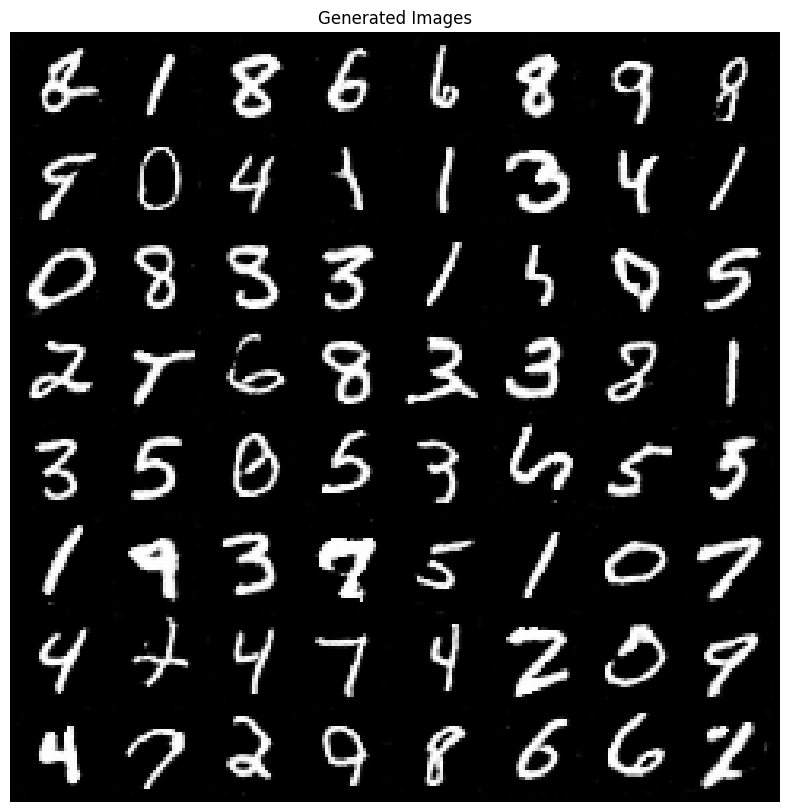

In [21]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(img_list[-1], (1,2,0)))
plt.show()
